# Ball and Stick

<cite data-cite="1647435/VAXS7CUI"></cite> proposed to represent the intra-axonal diffusion as a Stick - a cylinder with zero radius - and the extra-axonal diffusion as a Ball - an isotropic Gaussian compartment.

\begin{equation}
 E^{\textrm{Ball and}}_{\textrm{Sticks}}=\underbrace{f_h\overbrace{E_{iso}(\lambda_{\textrm{iso}})}^{\textrm{Ball}}}_{\textrm{Extra-Axonal}}+ \sum_{i=1}^{N}\underbrace{f_{i,r}\overbrace{E_r(\boldsymbol{\mu}_i|\lambda_\parallel)}^{\textrm{Stick}}}_{\textrm{Intra-Axonal}}
\end{equation}

For this first example, we will restrict ourselves to the case where $N$=2

# Human Connectome Project Example

In [1]:
from mipy.data import saved_data
scheme_hcp, data_hcp = saved_data.wu_minn_hcp_coronal_slice()

This data originates from Subject 100307 of the WU-Minn Human Connectome Project. View terms of use at https://store.humanconnectome.org/data/data-use-terms/open-access.php


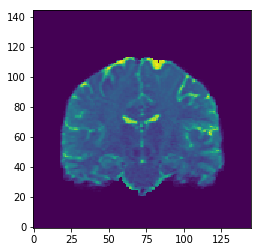

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data_hcp[:,0,:,0].T, origin=True)

In [29]:
data_hcp_small = data_hcp[70:90, :, 70:90]

## Generate Ball and Stick model

In [3]:
from mipy.signal_models import cylinder_models, gaussian_models
from mipy.core.modeling_framework import MultiCompartmentModel
ball = gaussian_models.G3Ball()
stick1 = cylinder_models.C1Stick()
stick2 = cylinder_models.C1Stick()
BAS_mod = MultiCompartmentModel(models=[ball, stick1, stick2])

In [4]:
BAS_mod.parameter_cardinality

OrderedDict([('G3Ball_1_lambda_iso', 1),
             ('C1Stick_2_mu', 2),
             ('C1Stick_1_mu', 2),
             ('C1Stick_1_lambda_par', 1),
             ('C1Stick_2_lambda_par', 1),
             ('partial_volume_0', 1),
             ('partial_volume_1', 1),
             ('partial_volume_2', 1)])

In [5]:
BAS_mod.fix_parameter('C1Stick_1_lambda_par', 1.7e-9)
BAS_mod.fix_parameter('C1Stick_2_lambda_par', 1.7e-9)

In [6]:
BAS_mod.parameter_cardinality

OrderedDict([('G3Ball_1_lambda_iso', 1),
             ('C1Stick_2_mu', 2),
             ('C1Stick_1_mu', 2),
             ('partial_volume_0', 1),
             ('partial_volume_1', 1),
             ('partial_volume_2', 1)])

## Fit Ball and Sticks model to HCP data

In [30]:
BAS_fit_hcp = BAS_mod.fit(scheme_hcp, data_hcp_small)

Using parallel processing with 8 workers.
Setup brute2fine optimizer in 17.2421150208 seconds
Fitting of 400 voxels complete in 52.4732379913 seconds.
Average of 0.131183094978 seconds per voxel.


In [62]:
from dipy.viz import fvtk
from dipy.viz.actor import slicer
import numpy as np
affine = np.eye(4)
affine[0,3] = -10
affine[1,3] = -10

volume1 = BAS_fit_hcp.fitted_parameters['partial_volume_1']
volume2 = BAS_fit_hcp.fitted_parameters['partial_volume_2']
volume_im = slicer(1-BAS_fit_hcp.fitted_parameters['partial_volume_0'][:,0], interpolation='nearest', affine=affine, opacity=0.7)

peak_intensities = np.concatenate([volume1, volume2], axis=-1)

ren = fvtk.ren()
peaks = BAS_fit_hcp.peaks_cartesian()
peaks_fvtk = fvtk.peaks(peaks, peak_intensities, scale=1.)
peaks_fvtk.RotateX(90)
peaks_fvtk.RotateZ(180)
peaks_fvtk.RotateY(180)
fvtk.add(ren, peaks_fvtk)
fvtk.add(ren, volume_im)
fvtk.record(ren=ren, size=[700, 700], out_path='dipy.png')

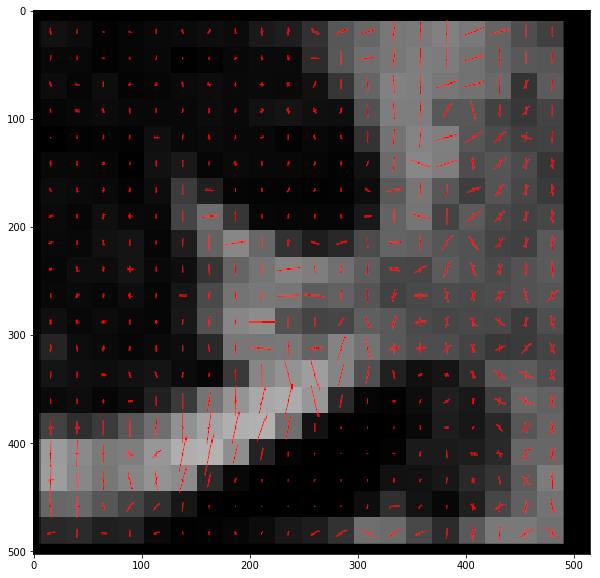

In [63]:
import matplotlib.image as mpimg
img = mpimg.imread('dipy.png')
plt.figure(figsize=[10, 10])
plt.imshow(img[100:-97, 100:-85])

In [58]:
BAS_fit_hcp_mix = BAS_mod.fit(scheme_hcp, data_hcp_small, solver='mix')

Using parallel processing with 8 workers.
Setup MIX optimizer in 5.96046447754e-06 seconds
Fitting of 400 voxels complete in 147.072157145 seconds.
Average of 0.367680392861 seconds per voxel.


In [64]:
from dipy.viz import fvtk
from dipy.viz.actor import slicer
import numpy as np
affine = np.eye(4)
affine[0,3] = -10
affine[1,3] = -10

volume1 = BAS_fit_hcp_mix.fitted_parameters['partial_volume_1']
volume2 = BAS_fit_hcp_mix.fitted_parameters['partial_volume_2']
volume_im = slicer(1-BAS_fit_hcp_mix.fitted_parameters['partial_volume_0'][:,0], interpolation='nearest', affine=affine, opacity=0.7)

peak_intensities = np.concatenate([volume1, volume2], axis=-1)

ren = fvtk.ren()
peaks = BAS_fit_hcp_mix.peaks_cartesian()
# peaks_intensities = volume[70:90, :, 70:90]
peaks_fvtk = fvtk.peaks(peaks, peak_intensities, scale=1.)
peaks_fvtk.RotateX(90)
peaks_fvtk.RotateZ(180)
peaks_fvtk.RotateY(180)
fvtk.add(ren, peaks_fvtk)
fvtk.add(ren, volume_im)
fvtk.record(ren=ren, size=[700, 700], out_path='dipy.png')

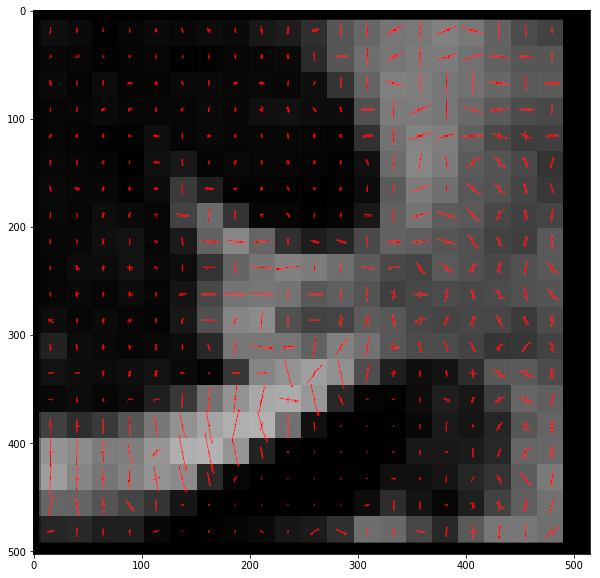

In [60]:
import matplotlib.image as mpimg
img = mpimg.imread('dipy.png')
plt.figure(figsize=[10, 10])
plt.imshow(img[100:-97, 100:-85])

## References
<div class="cite2c-biblio"></div>